In [14]:
import sklearn
import numpy
import pandas
import scipy
import re
import string
import datetime
from datetime import date

In [15]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [16]:
from sklearn import preprocessing 

In [17]:
pandas.options.mode.chained_assignment = None

In [18]:
file=open('./jbas7.csv')
data=pandas.read_csv(file)

In [19]:
data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Resolution,Components,Labels,...,Docs_lab,Build_lab,Testsuite_lab,ORM_lab,Rest_lab,Logging_lab,EE_lab,OSGI_lab,JCA_lab,Other_lab
0,0,0,AS7-6341,EJB2 CMP - 'JBAS014172: Instance not found in ...,Resolved,Application Server 7,Minor,Done,EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,1,AS7-6441,Transaction automatically started for MDB even...,Resolved,Application Server 7,Major,Done,EJB,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,2,AS7-995,Exploded EAR deployment error - java.util.zip....,Closed,Application Server 7,Major,Done,VFS,ear maven vfs,...,0,0,0,0,0,0,0,0,0,1
3,3,3,AS7-1739,resteasy.scan=true in web.xml causes error,Closed,Application Server 7,Minor,Done,REST Test Suite,NaN,...,0,0,1,0,1,0,0,0,0,0
4,4,4,AS7-4208,Inconsistent behaviour when dealing with reste...,Resolved,Application Server 7,Major,Done,REST,NaN,...,0,0,0,0,1,0,0,0,0,0
5,5,5,AS7-2593,Hang in IIOPNamingTestCase with OpenJDK,Resolved,Application Server 7,Major,Done,IIOP,NaN,...,0,0,0,0,0,0,0,0,0,0
6,6,6,AS7-6911,jconsole fails if trying to connect to a stand...,Resolved,Application Server 7,Major,Done,CLI,cli,...,0,0,0,0,0,0,0,0,0,1
7,7,7,AS7-2185,Don't expose the platform LoggingMXBean over m...,Resolved,Application Server 7,Major,Done,Domain Management,as7-ignored,...,0,0,0,0,0,0,0,0,0,0
8,8,8,AS7-5832,Unable to read undefined messaging queue attri...,Resolved,Application Server 7,Major,Done,JMS,NaN,...,0,0,0,0,0,0,0,0,0,0
9,9,9,AS7-4747,xercesImpl-2.9.1-jbossas-1.jar is susceptible ...,Resolved,Application Server 7,Major,Done,?,xercesImpl,...,0,0,0,0,0,0,0,0,0,1


ttr
Минимум: 0  Максимум: 1792  Среднее: 39.53498641304348
Attachments
Минимум: 0  Максимум: 15  Среднее: 0.21535326086956522
Comments
Минимум: 0  Максимум: 83  Среднее: 2.9096467391304346


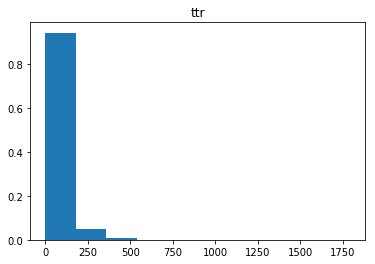

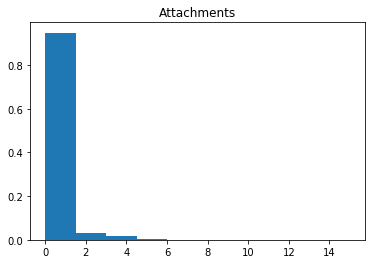

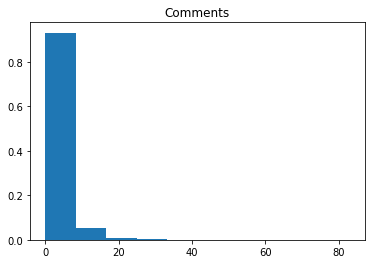

In [20]:
def infa(data, field):
    print (field)    
    print ('Минимум: ' + str(data[field].min())+ '  Максимум: ' + str(data[field].max())+'  Среднее: ' + str(data[field].mean()))
     
  
    plt.figure()
    btt=numpy.array(data[field])
    hist_rf=plt.hist(btt, weights=numpy.zeros_like(btt) + 1. / btt.size, bins=10)
    plt.title(field) 
    
    return

infa(data, 'ttr')
infa(data, 'Attachments')
infa(data, 'Comments')

Status
Closed       614
Resolved    2330
Name: Issue_key, dtype: int64


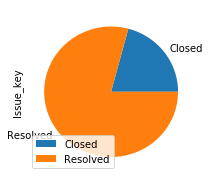

In [21]:
#Смотрим, какие статусы есть, и отображаем это на pie chart
print(data.groupby(['Status'])['Issue_key'].count())
plot = data.groupby(['Status'])['Issue_key'].count().plot.pie(y='Status', figsize=(3, 3), legend=True)


Resolution
Cannot Reproduce             89
Deferred                     10
Done                       2253
Duplicate Issue             112
Incomplete Description        5
Migrated to another ITS       1
Out of Date                 134
Partially Completed          12
Rejected                    251
Won't Fix                    77
Name: Issue_key, dtype: int64


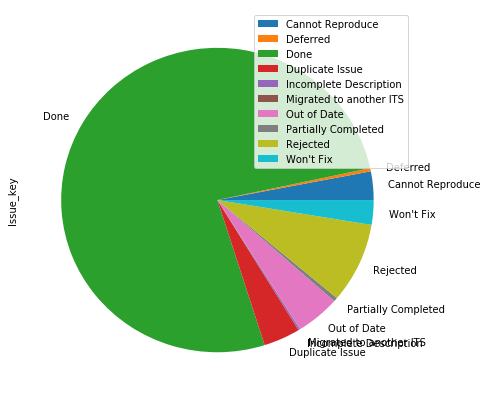

In [22]:
print(data.groupby(['Resolution'])['Issue_key'].count())
plot = data.groupby(['Resolution'])['Issue_key'].count().plot.pie(y='Status', figsize=(7, 7),  legend=True)

Priority
Blocker      166
Critical     313
Major       2262
Minor        191
Optional       4
Trivial        8
Name: Issue_key, dtype: int64


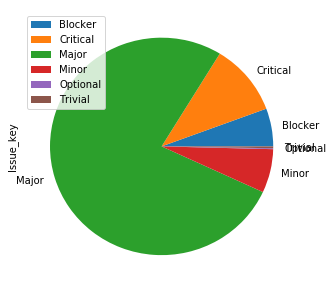

In [23]:
print(data.groupby(['Priority'])['Issue_key'].count())
plot = data.groupby(['Priority'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

was_reopened
0.0    2691
1.0     253
Name: Issue_key, dtype: int64


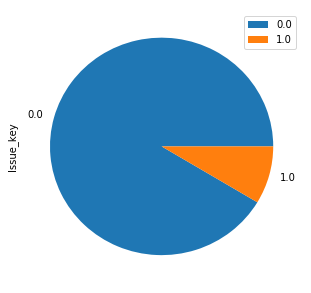

In [24]:
print(data.groupby(['was_reopened'])['Issue_key'].count())
plot = data.groupby(['was_reopened'])['Issue_key'].count().plot.pie(y='Status', figsize=(5, 5),legend=True)

In [25]:
AOT=['Config', 'Clustering', 'Deploy', 'DomManag', 'EJB', 'JMS', 'Security', 'Server', 'Web', 'Docs', 'Build','Testsuite', 'ORM', 'Rest', 'Logging', 'EE', 'OSGI', 'JCA' , 'Other']


<BarContainer object of 19 artists>

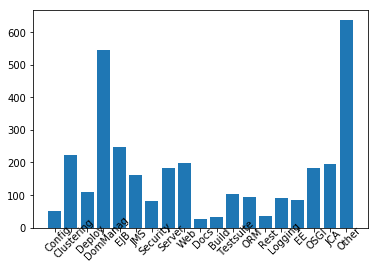

In [26]:
an={}
for i in range(len(AOT)):
    an.update({AOT[i]:data[AOT[i]+'_lab'].sum()}) 

#строим bar chart    
plt.figure()
plt.xticks(range(len(an)), an.keys(),rotation=45, rotation_mode='anchor')    
plt.bar(range(len(an)), an.values(), align='center')

In [27]:
bin_data=data

bin_data=pandas.get_dummies(bin_data, prefix=['Resolution'], columns=['Resolution'])

bin_data['Priority_ord']=bin_data['Priority'].astype("category", ordered=True,categories=['Optional', 'Trivial', 'Minor', 'Major', 'Critical', 'Blocker']).cat.codes

bin_data['norm_ttr']=preprocessing.scale(bin_data['ttr'])
bin_data['norm_att']=preprocessing.scale(bin_data['Attachments'])
bin_data['norm_comm']=preprocessing.scale(bin_data['Comments'])

bin_data['Resolution_Wont Fix_new']=bin_data["Resolution_Won't Fix"]+bin_data['Resolution_Incomplete Description']
bin_data['Resolution_Out of Date_new']=bin_data['Resolution_Out of Date']+bin_data['Resolution_Deferred']+bin_data['Resolution_Partially Completed']+bin_data['Resolution_Migrated to another ITS']

/Users/annagromova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
/Users/annagromova/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [28]:
bin_data

,Unnamed: 0,Unnamed: 0.1,Issue_key,Summary,Status,Project_name,Priority,Components,Labels,Description,...,Resolution_Out of Date,Resolution_Partially Completed,Resolution_Rejected,Resolution_Won't Fix,Priority_ord,norm_ttr,norm_att,norm_comm,Resolution_Wont Fix_new,Resolution_Out of Date_new
0,0,0,AS7-6341,EJB2 CMP - 'JBAS014172: Instance not found in ...,Resolved,Application Server 7,Minor,EJB,NaN,If an entity is removed and new created withi...,...,0,0,0,0,2,-0.387633,-0.285635,1.506962,0,0
1,1,1,AS7-6441,Transaction automatically started for MDB even...,Resolved,Application Server 7,Major,EJB,NaN,When an MDB uses BMT a transaction is still b...,...,0,0,0,0,3,-0.374938,-0.285635,-0.472512,0,0
2,2,2,AS7-995,Exploded EAR deployment error - java.util.zip....,Closed,Application Server 7,Major,VFS,ear maven vfs,"Deployment of EAR application (ejb module, JS...",...,0,0,0,0,3,-0.451106,1.040722,0.022356,0,0
3,3,3,AS7-1739,resteasy.scan=true in web.xml causes error,Closed,Application Server 7,Minor,REST Test Suite,NaN,If I use <tt>resteasy.scan=true</tt> configur...,...,0,0,0,0,2,0.259797,-0.285635,0.517225,0,0
4,4,4,AS7-4208,Inconsistent behaviour when dealing with reste...,Resolved,Application Server 7,Major,REST,NaN,Some of the early code uses these parameters ...,...,0,0,0,0,3,-0.501885,-0.285635,-0.719946,0,0
5,5,5,AS7-2593,Hang in IIOPNamingTestCase with OpenJDK,Resolved,Application Server 7,Major,IIOP,NaN,NaN,...,0,0,0,0,3,1.046869,3.693436,-0.225078,0,0
6,6,6,AS7-6911,jconsole fails if trying to connect to a stand...,Resolved,Application Server 7,Major,CLI,cli,If JBoss AS7/8 is started using port-offset a...,...,0,0,0,0,3,-0.451106,-0.285635,2.001830,0,0
7,7,7,AS7-2185,Don't expose the platform LoggingMXBean over m...,Resolved,Application Server 7,Major,Domain Management,as7-ignored,Currently we are exposing the logging MXBean ...,...,0,0,0,0,3,-0.247991,-0.285635,0.764659,0,0
8,8,8,AS7-5832,Unable to read undefined messaging queue attri...,Resolved,Application Server 7,Major,JMS,NaN,if there is no dead-letter-address defined fo...,...,0,0,0,0,3,-0.489190,-0.285635,-0.472512,0,0
9,9,9,AS7-4747,xercesImpl-2.9.1-jbossas-1.jar is susceptible ...,Resolved,Application Server 7,Major,?,xercesImpl,The current version of xerces (<em>xercesImpl...,...,0,0,0,0,3,-0.489190,-0.285635,-0.472512,0,0


In [29]:
clust_data=bin_data[['Config_lab',
 'Clustering_lab',
 'Deploy_lab',
 'DomManag_lab',
 'EJB_lab',
 'JMS_lab',
 'Security_lab',
 'Server_lab',
 'Web_lab',
 'Docs_lab',
 'Build_lab',
 'Testsuite_lab',
 'ORM_lab',
 'Rest_lab',
 'Logging_lab',
 'EE_lab',
 'OSGI_lab',
 'JCA_lab',
 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]


In [19]:
clust_data

,Config_lab,Clustering_lab,Deploy_lab,DomManag_lab,EJB_lab,JMS_lab,Security_lab,Server_lab,Web_lab,Docs_lab,...,Resolution_Done,Resolution_Duplicate Issue,Resolution_Out of Date_new,Resolution_Rejected,Resolution_Wont Fix_new,Resolution_Cannot Reproduce,Priority_ord,norm_ttr,norm_att,norm_comm
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2,-0.387633,-0.285635,1.506962
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.374938,-0.285635,-0.472512
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.451106,1.040722,0.022356
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0.259797,-0.285635,0.517225
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.501885,-0.285635,-0.719946
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,3,1.046869,3.693436,-0.225078
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.451106,-0.285635,2.001830
7,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.247991,-0.285635,0.764659
8,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,3,-0.489190,-0.285635,-0.472512
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,3,-0.489190,-0.285635,-0.472512


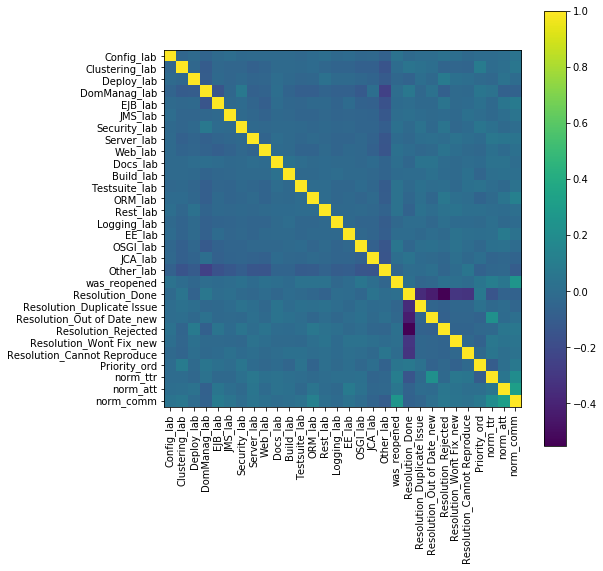

In [30]:
from matplotlib.colors import LinearSegmentedColormap
def corr_heatmap(data):
    fig, ax = plt.subplots()
    fig.set_size_inches(8,8)
    corr_ = data.corr(method='pearson')
    ax.set_xticks(numpy.arange(len(list(data))))
    ax.set_yticks(numpy.arange(len(list(data))))
    ax.set_xticklabels(list(data),rotation=90)
    ax.set_yticklabels(list(data))
    im = ax.imshow(corr_)
    plt.colorbar(im)
    return plt.show()


corr_heatmap(clust_data)


<function matplotlib.pyplot.bar(*args, **kwargs)>

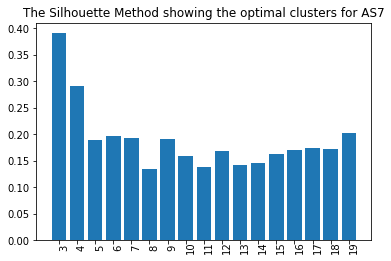

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

def silh_index(data,title):
    silh_ind={}
    for i in range(3,20):
        kmeans=KMeans(n_clusters=i, random_state=42)
        labi=kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data,labi)
        silh_ind.update({i:silhouette_avg})
    plt.figure()
    plt.xticks(range(len(silh_ind)), silh_ind.keys(),rotation=90, rotation_mode='anchor')    
    plt.bar(range(len(silh_ind)), silh_ind.values(), align='center')
    plt.title(title)
    return plt.bar

silh_index(clust_data,'The Silhouette Method showing the optimal clusters for AS7')


In [18]:
def km_clustering(n,data): 
    headers=list(data)
    zz={}
    km = KMeans(n_clusters=n, random_state=42).fit(data)
    data['cluster_km'] = km.labels_
    zentr=numpy.round(km.cluster_centers_, 3)    

    for i in range(n):
        zrow=zentr[i,:]
        zi=dict(zip(headers, zrow))
        zz.update({i:zi})             
    print(zz) 
    return data

data_km=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

d_km=km_clustering(3,data_km)
print (d_km.groupby(['cluster_km']).size())


{0: {'Logging_lab': 0.041, 'Resolution_Cannot Reproduce': 0.069, 'Web_lab': 0.098, 'Resolution_Wont Fix_new': 0.053, 'Server_lab': 0.065, 'DomManag_lab': 0.229, 'JCA_lab': 0.037, 'EJB_lab': 0.065, 'norm_att': -0.156, 'was_reopened': 0.171, 'Resolution_Done': 0.527, 'EE_lab': 0.045, 'Config_lab': 0.02, 'Docs_lab': 0.012, 'norm_ttr': 2.495, 'Deploy_lab': 0.016, 'Build_lab': 0.008, 'Rest_lab': 0.008, 'Resolution_Duplicate Issue': 0.024, 'JMS_lab': 0.045, 'OSGI_lab': 0.065, 'Testsuite_lab': 0.029, 'Priority_ord': 2.951, 'ORM_lab': 0.029, 'Resolution_Rejected': 0.082, 'Clustering_lab': 0.086, 'Resolution_Out of Date_new': 0.245, 'Security_lab': 0.02, 'norm_comm': 0.519, 'Other_lab': 0.22}, 1: {'Logging_lab': 0.03, 'Resolution_Cannot Reproduce': 0.025, 'Web_lab': 0.066, 'Resolution_Wont Fix_new': 0.023, 'Server_lab': 0.06, 'DomManag_lab': 0.188, 'JCA_lab': 0.071, 'EJB_lab': 0.079, 'norm_att': -0.202, 'was_reopened': 0.07, 'Resolution_Done': 0.794, 'EE_lab': 0.025, 'Config_lab': 0.016, 'Docs_

In [19]:
print(d_km.groupby(['cluster_km','Priority_ord']).size())

cluster_km  Priority_ord
0           1                  2
            2                 31
            3                190
            4                 21
            5                  1
1           0                  3
            1                  6
            2                153
            3               1932
            4                265
            5                154
2           0                  1
            2                  7
            3                140
            4                 27
            5                 11
dtype: int64


<module 'matplotlib.pyplot' from '/Users/annagromova/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

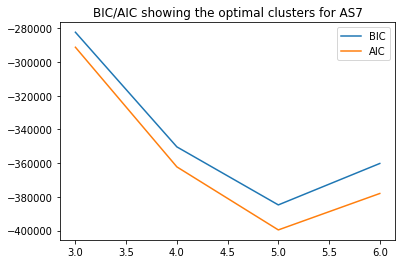

In [13]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GMM

def AIC_BIC(data, title):
    plt.figure()
    n_components = numpy.arange(3, 7)    
    models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data)
              for n in n_components]
    plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
    plt.legend() 
    plt.title(title)
    return plt

AIC_BIC(clust_data, 'BIC/AIC showing the optimal clusters for AS7')

In [14]:
def em_clust(data,n):
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data)
    data['cluster_em'] = gmm.predict(data)
    for i in range (n):
        temp=data[data['cluster_em']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())

    return 


clust_data_gmm=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

em_clust(clust_data_gmm,5)

Cluster # 0, count: 121
Config_lab                     0.008264
Clustering_lab                 0.041322
Deploy_lab                     0.280992
DomManag_lab                   0.016529
EJB_lab                        0.082645
JMS_lab                        0.082645
Security_lab                   0.041322
Server_lab                     0.033058
Web_lab                        0.024793
Docs_lab                       0.049587
Build_lab                      0.256198
Testsuite_lab                  0.000000
ORM_lab                        0.090909
Rest_lab                       0.107438
Logging_lab                    0.041322
EE_lab                         0.016529
OSGI_lab                       0.033058
JCA_lab                        0.115702
Other_lab                      0.000000
was_reopened                   0.115702
Resolution_Done                0.371901
Resolution_Duplicate Issue     0.132231
Resolution_Out of Date_new     0.148760
Resolution_Rejected            0.090909
Resolution_Wont 

In [20]:
print(clust_data_gmm.groupby(['cluster_em','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_gmm.groupby(['cluster_em',AOT[i]+'_lab']).size())

cluster_em  Priority_ord
0           2                 9
            3                94
            4                11
            5                 7
1           0                 1
            1                 3
            2                76
            3               900
            4               119
            5                68
2           1                 4
            2                50
            3               719
            4                86
            5                49
3           1                 1
            2                37
            3               375
            4                72
            5                38
4           0                 3
            2                19
            3               174
            4                25
            5                 4
dtype: int64
cluster_em  Config_lab
0           0              120
            1                1
1           0             1167
2           0              866
            1  

In [66]:
print(clust_data_gmm[(clust_data_gmm['Resolution_Out of Date_new']==1)&(clust_data_gmm['cluster_em']==3)]['norm_ttr'].mean())



1.935381640920369


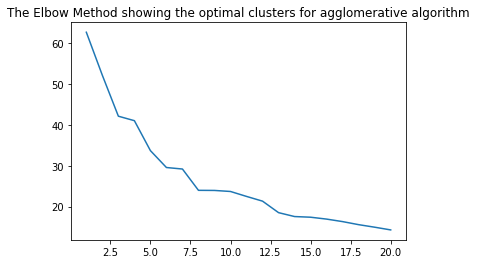

In [25]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def elbow(data):
    plt.figure()
    Z = linkage(data, 'ward')
    last = Z[-20:, 2]
    last_rev = last[::-1] #по убыванию
    idxs = numpy.arange(1, len(last) + 1)
    plt.plot(idxs, last_rev)
    plt.title('The Elbow Method showing the optimal clusters for agglomerative algorithm')
    return

elbow(clust_data)

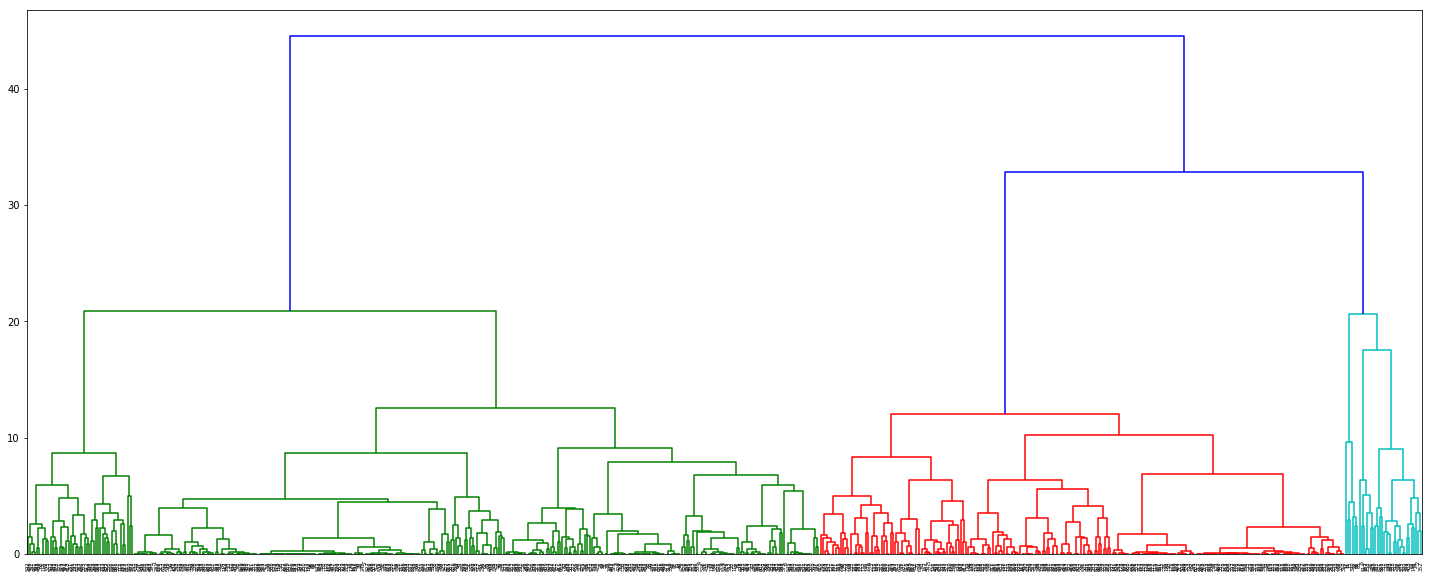

Cluster # 1, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resolution_Done               1.000000
Resolution_Duplicate Issue    0.000000
Resolution_Out of Date_new    0.000000
Resolution_Rejected_new       0.000000
Resolution_Wont Fix_new       0.000000
Priority_ord                  3.000000
norm_ttr                      1.157003
norm_att                     -0.187852
norm_comm                     0.034805
cluster_hier                  1.000000
dtype: float64
Cluster # 2, count: 1
authorization                 0.000000
authentication                1.000000
credential                    0.000000
ssl                           0.000000
api                           0.000000
utils                         0.000000
Other                         0.000000
Resol

dtype: float64
Cluster # 129, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    2.000000
norm_ttr                       -0.236109
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  129.000000
dtype: float64
Cluster # 130, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

dtype: float64
Cluster # 243, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    3.000000
norm_ttr                       -0.457333
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  243.000000
dtype: float64
Cluster # 244, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils               

Cluster # 377, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           0.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.576913
norm_att                       -0.187852
norm_comm                      -0.461350
cluster_hier                  377.000000
dtype: float64
Cluster # 378, count: 1
authorization                   1.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.0

Cluster # 493, count: 1
authorization                   0.000000
authentication                  0.000000
credential                      0.000000
ssl                             0.000000
api                             0.000000
utils                           0.000000
Other                           1.000000
Resolution_Done                 1.000000
Resolution_Duplicate Issue      0.000000
Resolution_Out of Date_new      0.000000
Resolution_Rejected_new         0.000000
Resolution_Wont Fix_new         0.000000
Priority_ord                    4.000000
norm_ttr                       -0.523102
norm_att                        4.561622
norm_comm                       3.011733
cluster_hier                  493.000000
dtype: float64
Cluster # 494, count: 0
authorization                NaN
authentication               NaN
credential                   NaN
ssl                          NaN
api                          NaN
utils                        NaN
Other                        NaN
Resolutio

In [98]:
hier(clust_data_hier,len(clust_data.index))

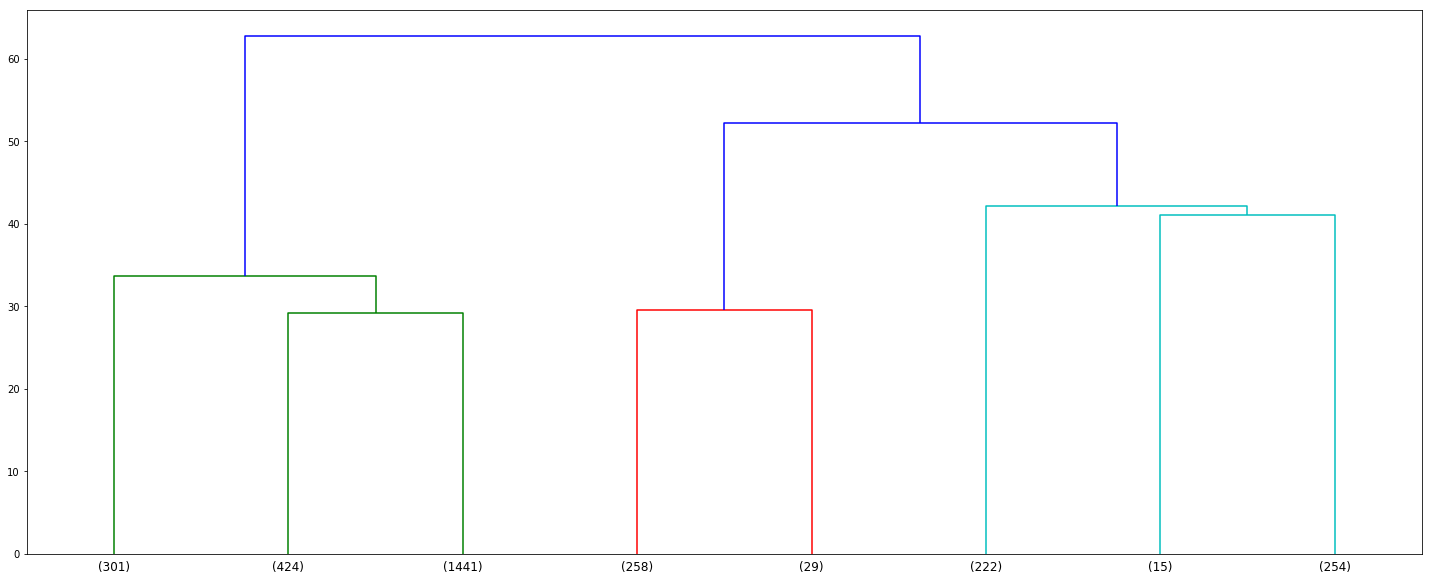

Cluster # 1, count: 301
Config_lab                     0.013289
Clustering_lab                 0.013289
Deploy_lab                     0.019934
DomManag_lab                   0.308970
EJB_lab                        0.102990
JMS_lab                        0.033223
Security_lab                   0.069767
Server_lab                     0.086379
Web_lab                        0.046512
Docs_lab                       0.003322
Build_lab                      0.003322
Testsuite_lab                  0.059801
ORM_lab                        0.009967
Rest_lab                       0.009967
Logging_lab                    0.019934
EE_lab                         0.026578
OSGI_lab                       0.043189
JCA_lab                        0.066445
Other_lab                      0.182724
was_reopened                   0.069767
Resolution_Done                0.860465
Resolution_Duplicate Issue     0.046512
Resolution_Out of Date_new     0.003322
Resolution_Rejected            0.073090
Resolution_Wont 

In [26]:

def hier(data, n_clust):
    Z = linkage(data, 'ward')
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z,truncate_mode='lastp', p=n_clust)
    plt.show()
    clust_num = fcluster(Z,n_clust,criterion='maxclust')
    data['cluster_hier']=clust_num
    for i in range (1,n_clust+1):
        temp=data[data['cluster_hier']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
    return 

clust_data_hier=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

hier(clust_data_hier,8)

In [120]:
print(clust_data_hier.groupby(['cluster_hier','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_hier.groupby(['cluster_hier',AOT[i]+'_lab']).size())


cluster_hier  Priority_ord
1             0                 3
              1                 3
              2                86
              3               185
              4                 9
2             2                55
              3               271
              4                30
              5                 7
3             0                 5
              1                11
              2               169
              3               741
              4                12
4             2                 1
              3                10
              4                 5
              5                11
5             3                 1
              4               110
              5               227
6             2                 5
              3               116
              4                14
              5                 4
7             2                16
              3               137
              4                35
              5      

In [31]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

def aff_clust(data):
    af = AffinityPropagation(preference=-400, damping=0.9).fit(data)
    cluster_centers_indices = af.cluster_centers_indices_
    data['cluster_aff'] = af.labels_

    n_clusters_aff = len(cluster_centers_indices)

    print('Number of clusters: ', n_clusters_aff)   
    
    for i in range (n_clusters_aff):
        print ('---------MEAN VALUES------')
        temp=data[data['cluster_aff']==i]
        print ('Cluster # '+str(i)+ ', count: '+str(len(temp.index)))
        print (temp.mean())
        
        print ('-------CLUSTER CENTERS-----')
        print ('zentroid # '+str(i))
        pos=cluster_centers_indices[i]
        print (data.iloc[pos])
    
    return

clust_data_aff=clust_data[['Config_lab', 'Clustering_lab', 'Deploy_lab', 'DomManag_lab', 'EJB_lab', 'JMS_lab', 'Security_lab', 'Server_lab', 'Web_lab', 'Docs_lab', 'Build_lab', 'Testsuite_lab', 'ORM_lab', 'Rest_lab', 'Logging_lab', 'EE_lab', 'OSGI_lab', 'JCA_lab', 'Other_lab','was_reopened','Resolution_Done', 'Resolution_Duplicate Issue', 'Resolution_Out of Date_new', 'Resolution_Rejected', 'Resolution_Wont Fix_new','Resolution_Cannot Reproduce', 'Priority_ord',  'norm_ttr', 'norm_att', 'norm_comm']]

aff_clust(clust_data_aff)

Number of clusters:  7
---------MEAN VALUES------
Cluster # 0, count: 236
Config_lab                     0.050847
Clustering_lab                 0.105932
Deploy_lab                     0.033898
DomManag_lab                   0.114407
EJB_lab                        0.241525
JMS_lab                        0.072034
Security_lab                   0.033898
Server_lab                     0.067797
Web_lab                        0.088983
Docs_lab                       0.008475
Build_lab                      0.012712
Testsuite_lab                  0.042373
ORM_lab                        0.084746
Rest_lab                       0.012712
Logging_lab                    0.021186
EE_lab                         0.025424
OSGI_lab                       0.046610
JCA_lab                        0.046610
Other_lab                      0.072034
was_reopened                   0.275424
Resolution_Done                0.766949
Resolution_Duplicate Issue     0.012712
Resolution_Out of Date_new     0.038136
Resolu

In [121]:
print(clust_data_aff.groupby(['cluster_aff','Priority_ord']).size())
for i in range(len(AOT)):
    print(clust_data_aff.groupby(['cluster_aff',AOT[i]+'_lab']).size())

cluster_aff  Priority_ord
0            2                30
             3               255
             4                25
1            2                 2
             3                16
             4                 6
             5                19
2            1                 2
             2                60
             3               218
             4                26
             5                 1
3            2                 9
             3                57
             4                13
             5                 7
4            0                 3
             1                 4
             2                78
             3               336
             4                47
5            4                40
             5               241
6            0                 3
             1                 3
             2                70
             3               143
             4                 7
7            0                 2
             1   

In [98]:
q1=bin_data[(bin_data['Resolution_Duplicate Issue']==1)|(bin_data['Resolution_Out of Date_new']==1)|(bin_data['Resolution_Rejected']==1)|(bin_data["Resolution_Wont Fix_new"]==1)|(bin_data['Resolution_Migrated to another ITS']==1)]
q2=bin_data[bin_data['Resolution_Done']==1]
q3=bin_data[bin_data['Resolution_Out of Date_new']==1]
q4=bin_data[bin_data['Resolution_Rejected']==1]
q5=bin_data[bin_data["Resolution_Wont Fix_new"]==1]
q6=bin_data[bin_data['Resolution_Migrated to another ITS']==1]
q7=bin_data[bin_data['Resolution_Duplicate Issue']==1]
q8=bin_data[bin_data['was_reopened']==1]

633
ttr
Минимум: 0  Максимум: 1354  Среднее: 223.24644549763033
Comments
Минимум: 1  Максимум: 28  Среднее: 3.448657187993681


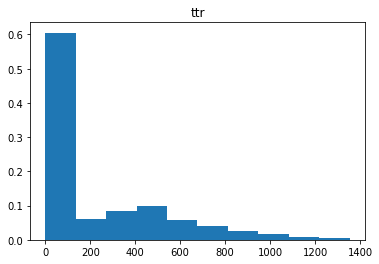

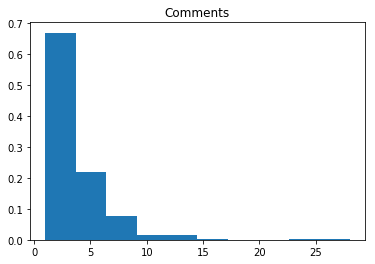

In [106]:
#проблемные баги
print(q1.Issue_key.count())
infa(q1,'ttr')
infa(q1,'Comments')

In [88]:
for i in range(len(AOT)):
    print(q1[[AOT[i]+'_lab']].sum())

Docs_lab    55
dtype: int64
Build_lab    92
dtype: int64
MonitorManage_lab    49
dtype: int64
ESB_lab    177
dtype: int64
EDS_lab    89
dtype: int64
JBPM_lab    43
dtype: int64
JMS_lab    14
dtype: int64
Tools_lab    51
dtype: int64
EAP_lab    19
dtype: int64
jUddi_lab    18
dtype: int64
BPEL_lab    20
dtype: int64
JBossWS_lab    29
dtype: int64
JBRules_lab    12
dtype: int64
Examples_lab    62
dtype: int64
Other_lab    34
dtype: int64


1665
ttr
Минимум: 0  Максимум: 1206  Среднее: 79.12972972972973
Comments
Минимум: 1  Максимум: 34  Среднее: 4.948348348348349


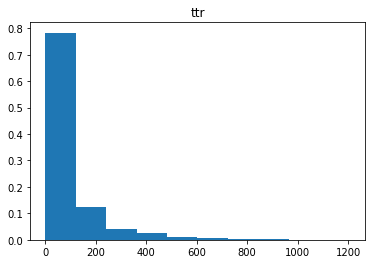

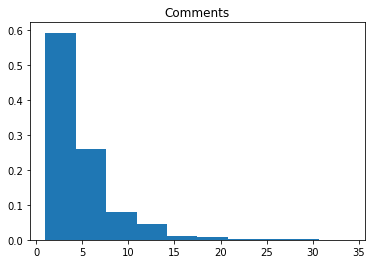

In [107]:
#беспроблемные
print(q2.Issue_key.count())
infa(q2,'ttr')
infa(q2,'Comments')

In [89]:
for i in range(len(AOT)):
    print(q2[[AOT[i]+'_lab']].sum())

Docs_lab    254
dtype: int64
Build_lab    276
dtype: int64
MonitorManage_lab    95
dtype: int64
ESB_lab    464
dtype: int64
EDS_lab    269
dtype: int64
JBPM_lab    126
dtype: int64
JMS_lab    9
dtype: int64
Tools_lab    154
dtype: int64
EAP_lab    44
dtype: int64
jUddi_lab    54
dtype: int64
BPEL_lab    50
dtype: int64
JBossWS_lab    32
dtype: int64
JBRules_lab    43
dtype: int64
Examples_lab    123
dtype: int64
Other_lab    47
dtype: int64


140
ttr
Минимум: 0  Максимум: 1239  Среднее: 514.2071428571429
Comments
Минимум: 1  Максимум: 15  Среднее: 3.0785714285714287


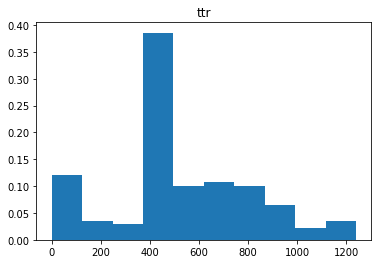

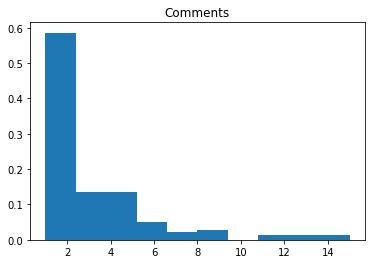

In [108]:
print(q3.Issue_key.count())
infa(q3,'ttr')
infa(q3,'Comments')

In [114]:
for i in range(len(AOT)):
    print(q3[[AOT[i]+'_lab']].sum())


Docs_lab    19
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    5
dtype: int64
ESB_lab    45
dtype: int64
EDS_lab    9
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    3
dtype: int64
Tools_lab    11
dtype: int64
EAP_lab    10
dtype: int64
jUddi_lab    7
dtype: int64
BPEL_lab    1
dtype: int64
JBossWS_lab    7
dtype: int64
JBRules_lab    2
dtype: int64
Examples_lab    24
dtype: int64
Other_lab    5
dtype: int64


148
ttr
Минимум: 0  Максимум: 444  Среднее: 32.41891891891892
Comments
Минимум: 1  Максимум: 11  Среднее: 3.4864864864864864


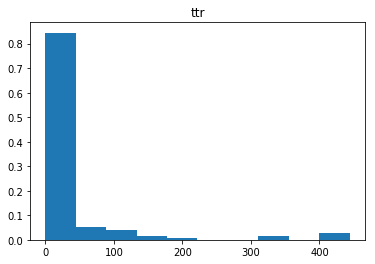

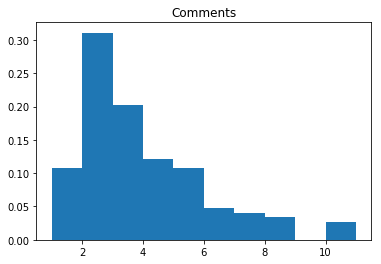

In [109]:
#отклоненные
print(q4.Issue_key.count())
infa(q4,'ttr')
infa(q4,'Comments')

In [92]:
for i in range(len(AOT)):
    print(q4[[AOT[i]+'_lab']].sum())

Docs_lab    10
dtype: int64
Build_lab    25
dtype: int64
MonitorManage_lab    9
dtype: int64
ESB_lab    44
dtype: int64
EDS_lab    32
dtype: int64
JBPM_lab    8
dtype: int64
JMS_lab    5
dtype: int64
Tools_lab    7
dtype: int64
EAP_lab    1
dtype: int64
jUddi_lab    3
dtype: int64
BPEL_lab    7
dtype: int64
JBossWS_lab    8
dtype: int64
JBRules_lab    3
dtype: int64
Examples_lab    8
dtype: int64
Other_lab    7
dtype: int64


140
ttr
Минимум: 0  Максимум: 962  Среднее: 233.2
Comments
Минимум: 1  Максимум: 25  Среднее: 4.2785714285714285


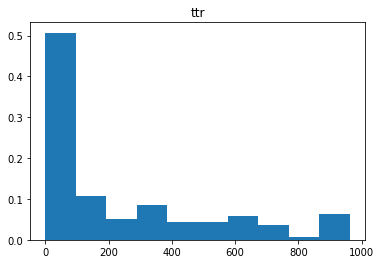

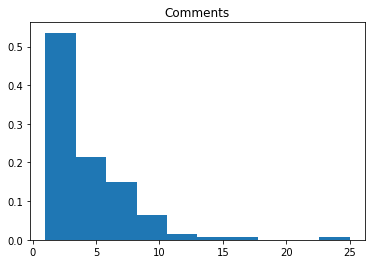

In [110]:
#Wont Fix
print(q5.Issue_key.count())
infa(q5,'ttr')
infa(q5,'Comments')

In [115]:
for i in range(len(AOT)):
    print(q5[[AOT[i]+'_lab']].sum())

Docs_lab    7
dtype: int64
Build_lab    17
dtype: int64
MonitorManage_lab    22
dtype: int64
ESB_lab    34
dtype: int64
EDS_lab    24
dtype: int64
JBPM_lab    12
dtype: int64
JMS_lab    2
dtype: int64
Tools_lab    15
dtype: int64
EAP_lab    3
dtype: int64
jUddi_lab    1
dtype: int64
BPEL_lab    3
dtype: int64
JBossWS_lab    2
dtype: int64
JBRules_lab    6
dtype: int64
Examples_lab    13
dtype: int64
Other_lab    7
dtype: int64


126
ttr
Минимум: 0  Максимум: 1354  Среднее: 238.515873015873
Comments
Минимум: 1  Максимум: 28  Среднее: 3.2222222222222223


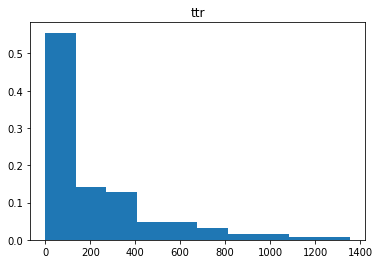

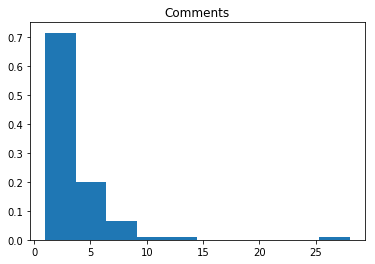

In [111]:
#migration
print(q6.Issue_key.count())
infa(q6,'ttr')
infa(q6,'Comments')

79
ttr
Минимум: 0  Максимум: 383  Среднее: 23.126582278481013
Comments
Минимум: 1  Максимум: 13  Среднее: 2.9240506329113924


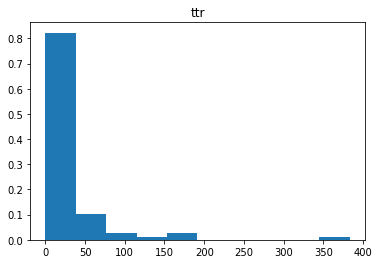

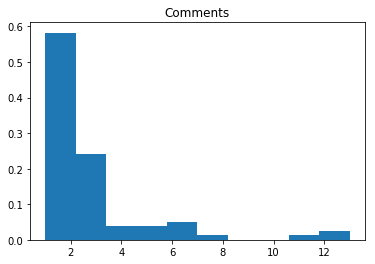

In [112]:
#дубликаты
print(q7.Issue_key.count())
infa(q7,'ttr')
infa(q7,'Comments')

510
ttr
Минимум: 0  Максимум: 1354  Среднее: 168.19607843137254
Comments
Минимум: 1  Максимум: 34  Среднее: 7.031372549019608


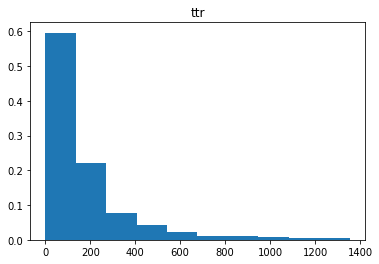

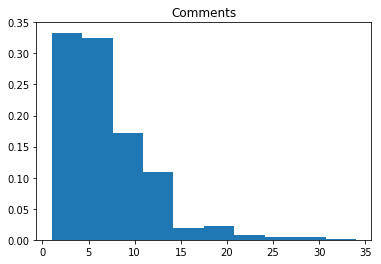

In [113]:
# reopened
print(q8.Issue_key.count())
infa(q8,'ttr')
infa(q8,'Comments')

In [116]:
for i in range(len(AOT)):
    print(q8[[AOT[i]+'_lab']].sum())

Docs_lab    79
dtype: int64
Build_lab    99
dtype: int64
MonitorManage_lab    42
dtype: int64
ESB_lab    148
dtype: int64
EDS_lab    47
dtype: int64
JBPM_lab    49
dtype: int64
JMS_lab    7
dtype: int64
Tools_lab    43
dtype: int64
EAP_lab    13
dtype: int64
jUddi_lab    17
dtype: int64
BPEL_lab    27
dtype: int64
JBossWS_lab    10
dtype: int64
JBRules_lab    15
dtype: int64
Examples_lab    41
dtype: int64
Other_lab    11
dtype: int64
